In [1]:
# 単回帰モデルに関する例題
library(rstan)
library(brms)

rstan_options(auto_write=TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: Rcpp

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Loading 'brms' package (version 2.10.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:rstan’:

    loo




In [2]:
# 中身を確認
head(cars, n=3)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


In [3]:
# サンプル数の確認
sample_size <- nrow(cars)
sample_size

[1] 50

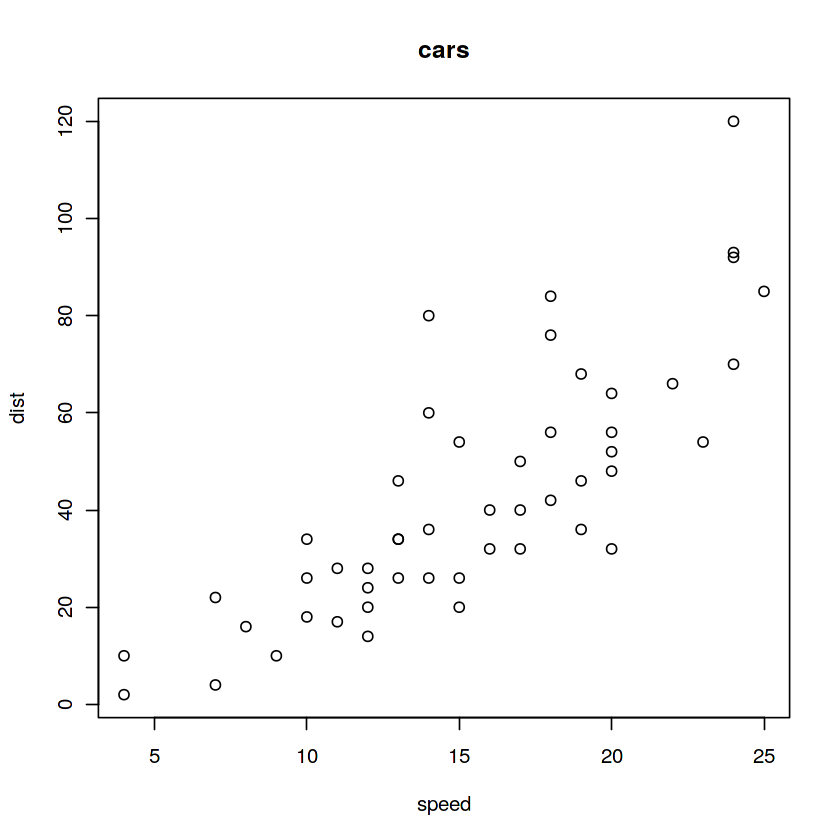

In [4]:
# サンプルの分布について確認
plot(cars, main = "cars")

In [5]:
# 速度の例を生成(後で予測するときに使う)
speed_pred <- 5:25
speed_pred

[1]  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25

In [6]:
# データ一覧の作成
data_list_pred<- list(
    N=sample_size,
    dist=cars$dist,
    speed=cars$speed,
    N_pred = length(speed_pred),
    speed_pred=speed_pred
)

In [7]:
# モデルの定義
# 単回帰モデルを想定している

simple_lm_brms <- brm(
    formula = dist ~ speed,                    # model の構造
    family = gaussian(link ="identity"), # 正規分布
    data = cars,                                      # データ
    seed = 1 # シード
)

Compiling the C++ model

Start sampling



In [8]:
# mcmcに基づいてサンプリング
as.mcmc(simple_lm_brms, combine_chains =TRUE)

Markov Chain Monte Carlo (MCMC) output:
Start = 4001 
End = 8000 
Thinning interval = 1 
          parameters
iterations b_Intercept  b_speed    sigma      lp__
      [1,] -11.7110919 3.515061 16.61696 -212.6853
      [2,] -19.4894018 4.119177 14.53283 -212.1599
      [3,] -16.4684642 3.791824 16.10870 -212.1562
      [4,]  -8.4266195 3.318145 17.12911 -213.4111
      [5,] -26.7942446 4.536589 13.89118 -213.5273
      [6,] -28.0542183 4.592055 13.32716 -214.4121
      [7,]  -4.3005230 3.084532 17.88792 -214.6167
      [8,]  -3.7072074 2.992024 17.91807 -215.0008
      [9,] -16.9276055 4.286800 17.60056 -216.2739
     [10,] -17.7799030 4.121311 19.19564 -214.8537
     [11,] -21.2080962 4.191974 20.47862 -215.7119
     [12,] -16.0595024 3.933046 13.37814 -213.0233
     [13,] -16.2435950 3.877787 13.49433 -212.6061
     [14,] -19.7971728 4.129934 18.78180 -213.9805
     [15,] -16.7078611 3.366506 17.61642 -218.4708
     [16,]  -2.8422717 3.483031 15.12086 -219.3002
     [17,] -20.1111462 

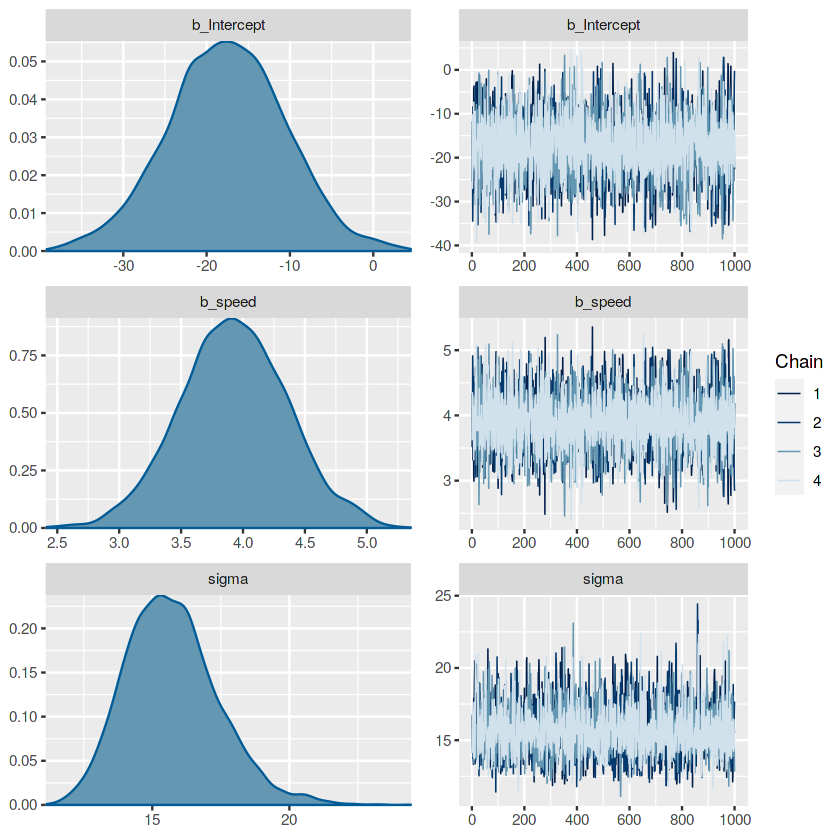

In [9]:
# 事後分布の確認
plot(simple_lm_brms)

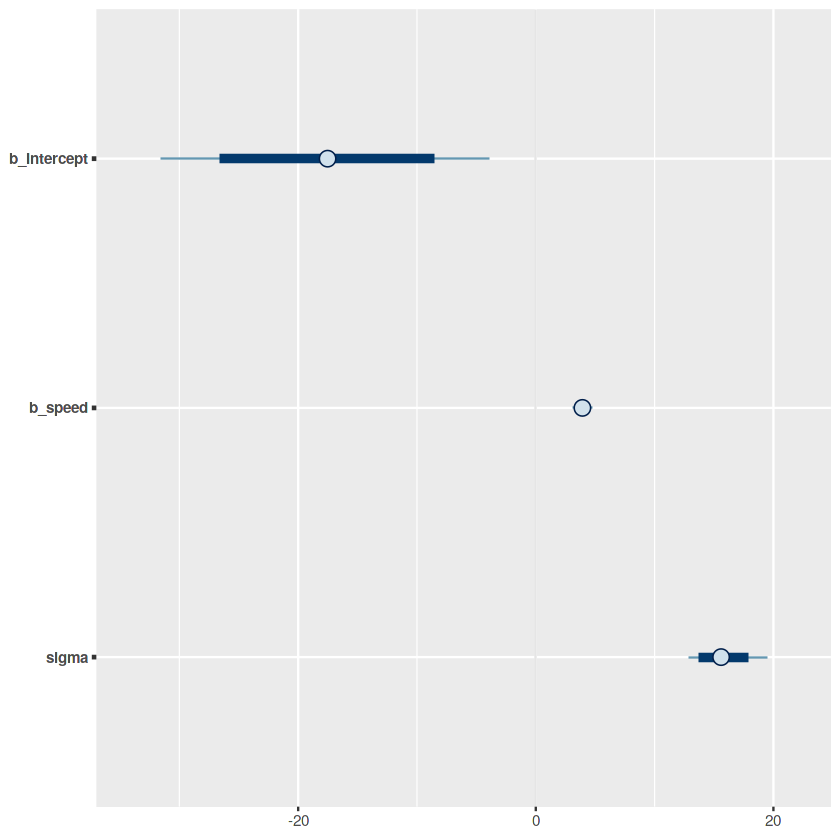

In [10]:
# 係数の信用区間の表示
stanplot(
    simple_lm_brms,
    type = "intervals",
    prob = 0.8,
    prob_outer = 0.95
)

In [11]:
#モデルに基づいた速度30のときの停止距離の予測値
new_data <- data.frame(speed=30)
set.seed(1)
predict(simple_lm_brms, new_data)

Estimate,Est.Error,Q2.5,Q97.5
100.2693,17.72167,65.70265,135.1864


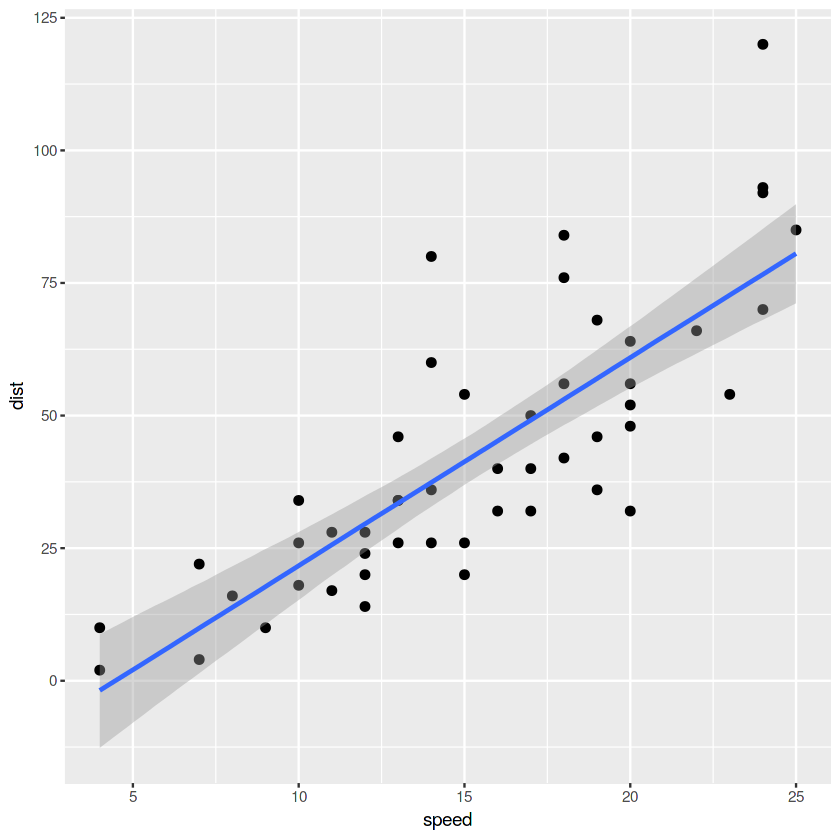

In [12]:
# 停止距離の回帰直線、95%ベイズ信用区間つき
eff <- marginal_effects(simple_lm_brms)
plot(eff, points=TRUE)

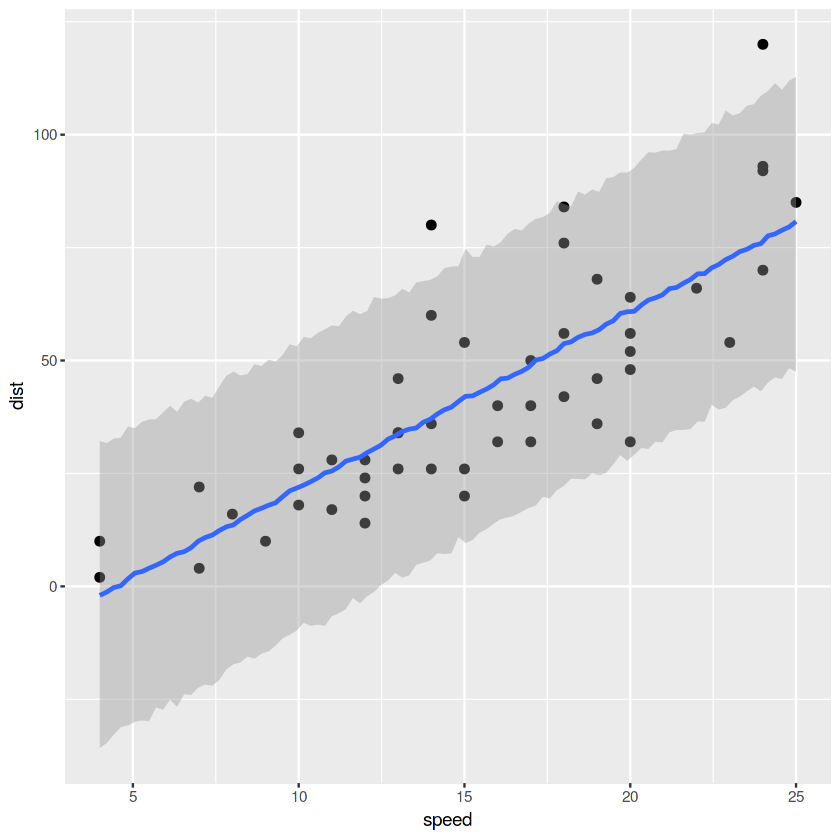

In [13]:
#回帰直線, 95%予測区間つき
set.seed(1)
eff_pre<- marginal_effects(simple_lm_brms, method = "predict")
plot(eff_pre, points=TRUE)